In [1]:
import pandas as pd
df =pd.read_csv('Kid.csv')

In [2]:
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [14]:
x=df.iloc[:,2:]
y=df.iloc[:,1:2]

In [15]:
df.shape

(673, 18)

In [16]:
from sklearn.model_selection import train_test_split as t
Xtrain,Xtest,Ytrain,Ytest=t(x,y,test_size=0.2,random_state=0)

In [17]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(538, 16)
(135, 16)
(538, 1)
(135, 1)


In [18]:
from sklearn.neighbors import KNeighborsClassifier as kn
knn=kn(n_neighbors=5)
knn.fit(Xtrain,Ytrain)
y_pred=knn.predict(Xtest)



C:\Users\GANESHBABU\Anaconda3\include\New folder\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
from sklearn.metrics import accuracy_score as s
s(Ytest,y_pred)

0.9111111111111111

In [62]:
from sklearn.preprocessing import scale
df=scale(df)

C:\Users\GANESHBABU\Anaconda3\include\New folder\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [3]:
from sklearn.decomposition import PCA
pcs=PCA()
pca_values=pcs.fit_transform(df)

In [4]:

var=pcs.explained_variance_ratio_

In [5]:
import numpy as np
var=np.cumsum(np.round(var,decimals=4)*100)
var

array([ 99.99, 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  ])

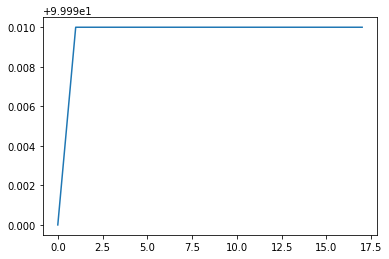

In [8]:
from matplotlib import pyplot as plt
plt.plot(var)
plt.show()

In [40]:
pcs=pd.DataFrame(pca_values)
pcs.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-11078.783304,334.944386,9.037021,0.365520,-0.049812,0.264088,0.816673,-0.958494,-0.738265,0.139755,-0.425265,-0.319522,-0.011451,0.648727,0.150807,0.126139,0.107632,-0.067064
1,39921.214970,338.852587,-7.859823,-0.419578,-0.898297,-0.060132,0.216072,-0.275397,-0.071432,0.006402,-0.401802,0.282259,-0.573166,-0.137834,0.536022,-0.181034,0.068643,0.012083
2,10921.217805,335.088742,16.507406,-1.185950,-0.163593,-0.227897,0.001030,0.262937,0.371325,0.004184,0.159745,-0.367608,0.255240,-0.131505,-0.021254,-0.383236,-0.021046,-0.036970
3,34921.219837,336.443386,32.720766,0.196955,0.085196,0.181859,-0.401848,-0.194784,0.078461,-0.739776,0.167266,0.563542,-0.689666,0.038119,0.610759,0.201366,-0.255845,-0.034436
4,7921.216967,332.782455,7.842154,0.718197,0.245905,-0.841380,0.112335,0.612622,-0.084603,0.068412,-0.044964,0.230133,0.848294,-0.077633,0.194217,0.107973,-0.119865,0.000979


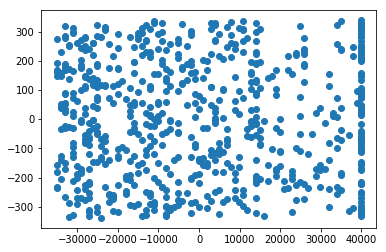

In [41]:
from matplotlib import pyplot as plt
plt.scatter(pcs[0],pcs[1])

In [48]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(pcs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

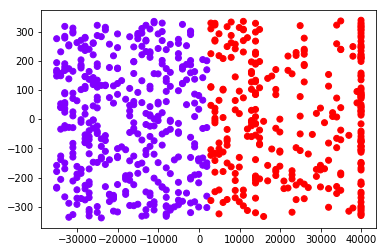

In [52]:
plt.scatter(pcs[0],pcs[1],c=Kmeans.labels_,cmap='rainbow')

In [53]:
Kmeans=KMeans(n_clusters=3)
Kmeans.fit(pcs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

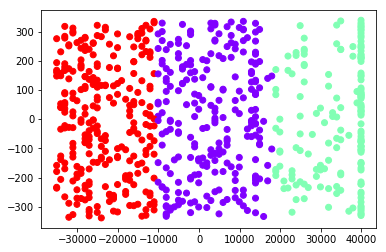

In [54]:
plt.scatter(pcs[0],pcs[1],c=Kmeans.labels_,cmap='rainbow')